In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [5]:
import pathlib
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, MaxPooling1D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import SGD

In [7]:
import pandas as pd

In [8]:
#  for train_test_split() method
import sklearn as sklearn

In [9]:
#  for train_test_split() method
from sklearn.model_selection import train_test_split

In [12]:
#custom script to load csv data as needed for model training

def readucr(filename):
    data = np.loadtxt(filename, delimiter=",")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


#load volume data
root_filename = "Resampled_myData_Volume_Only.csv"

x_1, y_1 = readucr(root_filename )


In [13]:
#load flow data

root_filename = "Resampled_myData_Flow_Only.csv"

x_2, y_2 = readucr(root_filename )

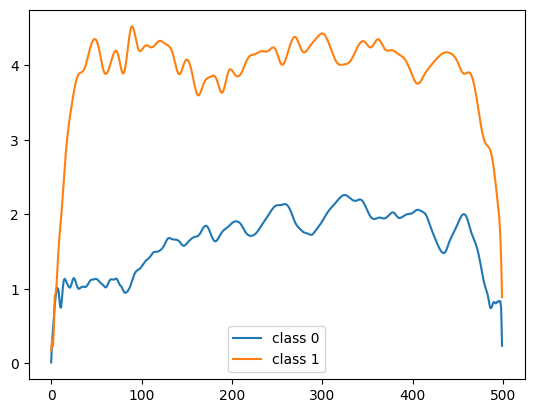

In [18]:
#view a single flow volume loop to check
classes = np.unique(y_1)

plt.figure()
for c in classes:
    c_x_train2 = x_2[y_2 == c]
    plt.plot(c_x_train2[13], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [20]:
#merge all data into a single array
x_all = np.concatenate((x_1[...,np.newaxis],x_2[...,np.newaxis]),axis=2)

In [21]:
#calculate number of classes for later use
num_classes = len(np.unique(y_1))
print(num_classes)

2


In [22]:
#setup a random permutation for shuffling data
idx = np.random.permutation(len(x_all))
x_all = x_all[idx]
y_1 = y_1[idx]

In [23]:
#split into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(x_all, y_1, test_size=0.33, random_state=3)



In [27]:
import pydot
import graphviz

In [37]:
## declare model architecture

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 498, 64)           448       
                                                                 
 conv1d_3 (Conv1D)           (None, 496, 64)           12352     
                                                                 
 dropout_1 (Dropout)         (None, 496, 64)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 248, 64)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 15872)             0         
                                                                 
 dense_2 (Dense)             (None, 100)               1587300   
                                                      

In [39]:
#declare model training parameters and train the model
epochs = 500
batch_size = 250
#optimizer = keras.optimizers.Adam(lr=0.01)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=50, min_lr=0.001
    )#,
    #keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]



model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

history = model.fit(
    X_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.1,
    verbose=1,
)

Epoch 1/500
3/8 [==========>...................] - ETA: 0s - loss: 6.0186 - sparse_categorical_accuracy: 0.5240

2023-03-13 17:57:08.250640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 45ms/step - loss: 3.1547 - sparse_categorical_accuracy: 0.4966 - val_loss: 0.5910 - val_sparse_categorical_accuracy: 0.6751 - lr: 0.0010
Epoch 2/500
4/8 [==============>...............] - ETA: 0s - loss: 0.7115 - sparse_categorical_accuracy: 0.6420

2023-03-13 17:57:08.627893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 21ms/step - loss: 0.6592 - sparse_categorical_accuracy: 0.6804 - val_loss: 0.6073 - val_sparse_categorical_accuracy: 0.6599 - lr: 0.0010
Epoch 3/500
8/8 [==============================] - 0s 24ms/step - loss: 0.5951 - sparse_categorical_accuracy: 0.7121 - val_loss: 0.5636 - val_sparse_categorical_accuracy: 0.7563 - lr: 0.0010
Epoch 4/500
8/8 [==============================] - 0s 25ms/step - loss: 0.5689 - sparse_categorical_accuracy: 0.7347 - val_loss: 0.5527 - val_sparse_categorical_accuracy: 0.7310 - lr: 0.0010
Epoch 5/500
8/8 [==============================] - 0s 24ms/step - loss: 0.5621 - sparse_categorical_accuracy: 0.7376 - val_loss: 0.5503 - val_sparse_categorical_accuracy: 0.7614 - lr: 0.0010
Epoch 6/500
8/8 [==============================] - 0s 21ms/step - loss: 0.5627 - sparse_categorical_accuracy: 0.7460 - val_loss: 0.5562 - val_sparse_categorical_accuracy: 0.7462 - lr: 0.0010
Epoch 7/500
8/8 [==============================] - 0s 24m

Epoch 45/500
8/8 [==============================] - 0s 21ms/step - loss: 0.4914 - sparse_categorical_accuracy: 0.7579 - val_loss: 0.4760 - val_sparse_categorical_accuracy: 0.7766 - lr: 0.0010
Epoch 46/500
8/8 [==============================] - 0s 21ms/step - loss: 0.5026 - sparse_categorical_accuracy: 0.7455 - val_loss: 0.4963 - val_sparse_categorical_accuracy: 0.7970 - lr: 0.0010
Epoch 47/500
8/8 [==============================] - 0s 21ms/step - loss: 0.4943 - sparse_categorical_accuracy: 0.7557 - val_loss: 0.4912 - val_sparse_categorical_accuracy: 0.7614 - lr: 0.0010
Epoch 48/500
8/8 [==============================] - 0s 21ms/step - loss: 0.4936 - sparse_categorical_accuracy: 0.7687 - val_loss: 0.5503 - val_sparse_categorical_accuracy: 0.7310 - lr: 0.0010
Epoch 49/500
8/8 [==============================] - 0s 22ms/step - loss: 0.5120 - sparse_categorical_accuracy: 0.7523 - val_loss: 0.4855 - val_sparse_categorical_accuracy: 0.7665 - lr: 0.0010
Epoch 50/500
8/8 [======================

Epoch 88/500
8/8 [==============================] - 0s 24ms/step - loss: 0.3964 - sparse_categorical_accuracy: 0.8162 - val_loss: 0.3930 - val_sparse_categorical_accuracy: 0.8071 - lr: 0.0010
Epoch 89/500
8/8 [==============================] - 0s 21ms/step - loss: 0.3880 - sparse_categorical_accuracy: 0.8230 - val_loss: 0.4121 - val_sparse_categorical_accuracy: 0.8274 - lr: 0.0010
Epoch 90/500
8/8 [==============================] - 0s 21ms/step - loss: 0.4278 - sparse_categorical_accuracy: 0.7986 - val_loss: 0.4042 - val_sparse_categorical_accuracy: 0.8173 - lr: 0.0010
Epoch 91/500
8/8 [==============================] - 0s 22ms/step - loss: 0.3858 - sparse_categorical_accuracy: 0.8230 - val_loss: 0.4305 - val_sparse_categorical_accuracy: 0.8173 - lr: 0.0010
Epoch 92/500
8/8 [==============================] - 0s 23ms/step - loss: 0.3974 - sparse_categorical_accuracy: 0.8133 - val_loss: 0.4178 - val_sparse_categorical_accuracy: 0.8223 - lr: 0.0010
Epoch 93/500
8/8 [======================

8/8 [==============================] - 0s 20ms/step - loss: 0.2320 - sparse_categorical_accuracy: 0.9010 - val_loss: 0.2941 - val_sparse_categorical_accuracy: 0.8782 - lr: 0.0010
Epoch 173/500
8/8 [==============================] - 0s 20ms/step - loss: 0.2228 - sparse_categorical_accuracy: 0.9101 - val_loss: 0.3043 - val_sparse_categorical_accuracy: 0.8782 - lr: 0.0010
Epoch 174/500
8/8 [==============================] - 0s 25ms/step - loss: 0.2305 - sparse_categorical_accuracy: 0.9033 - val_loss: 0.2835 - val_sparse_categorical_accuracy: 0.8832 - lr: 0.0010
Epoch 175/500
8/8 [==============================] - 0s 21ms/step - loss: 0.2400 - sparse_categorical_accuracy: 0.8965 - val_loss: 0.3030 - val_sparse_categorical_accuracy: 0.8680 - lr: 0.0010
Epoch 176/500
8/8 [==============================] - 0s 21ms/step - loss: 0.2339 - sparse_categorical_accuracy: 0.9033 - val_loss: 0.3182 - val_sparse_categorical_accuracy: 0.8832 - lr: 0.0010
Epoch 177/500
8/8 [==============================

8/8 [==============================] - 0s 21ms/step - loss: 0.1357 - sparse_categorical_accuracy: 0.9508 - val_loss: 0.2539 - val_sparse_categorical_accuracy: 0.9086 - lr: 0.0010
Epoch 257/500
8/8 [==============================] - 0s 20ms/step - loss: 0.1342 - sparse_categorical_accuracy: 0.9502 - val_loss: 0.2774 - val_sparse_categorical_accuracy: 0.9086 - lr: 0.0010
Epoch 258/500
8/8 [==============================] - 0s 25ms/step - loss: 0.1223 - sparse_categorical_accuracy: 0.9576 - val_loss: 0.2335 - val_sparse_categorical_accuracy: 0.9188 - lr: 0.0010
Epoch 259/500
8/8 [==============================] - 0s 21ms/step - loss: 0.1293 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.2631 - val_sparse_categorical_accuracy: 0.9086 - lr: 0.0010
Epoch 260/500
8/8 [==============================] - 0s 20ms/step - loss: 0.1610 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.2721 - val_sparse_categorical_accuracy: 0.8782 - lr: 0.0010
Epoch 261/500
8/8 [==============================

8/8 [==============================] - 0s 21ms/step - loss: 0.0858 - sparse_categorical_accuracy: 0.9632 - val_loss: 0.3155 - val_sparse_categorical_accuracy: 0.9239 - lr: 0.0010
Epoch 341/500
8/8 [==============================] - 0s 20ms/step - loss: 0.0807 - sparse_categorical_accuracy: 0.9723 - val_loss: 0.2726 - val_sparse_categorical_accuracy: 0.9188 - lr: 0.0010
Epoch 342/500
8/8 [==============================] - 0s 20ms/step - loss: 0.0773 - sparse_categorical_accuracy: 0.9712 - val_loss: 0.2963 - val_sparse_categorical_accuracy: 0.9137 - lr: 0.0010
Epoch 343/500
8/8 [==============================] - 0s 20ms/step - loss: 0.0849 - sparse_categorical_accuracy: 0.9666 - val_loss: 0.3069 - val_sparse_categorical_accuracy: 0.9289 - lr: 0.0010
Epoch 344/500
8/8 [==============================] - 0s 21ms/step - loss: 0.0885 - sparse_categorical_accuracy: 0.9672 - val_loss: 0.2863 - val_sparse_categorical_accuracy: 0.9086 - lr: 0.0010
Epoch 345/500
8/8 [==============================

8/8 [==============================] - 0s 21ms/step - loss: 0.0830 - sparse_categorical_accuracy: 0.9717 - val_loss: 0.2649 - val_sparse_categorical_accuracy: 0.9188 - lr: 0.0010
Epoch 425/500
8/8 [==============================] - 0s 21ms/step - loss: 0.0914 - sparse_categorical_accuracy: 0.9644 - val_loss: 0.2759 - val_sparse_categorical_accuracy: 0.9137 - lr: 0.0010
Epoch 426/500
8/8 [==============================] - 0s 22ms/step - loss: 0.0851 - sparse_categorical_accuracy: 0.9661 - val_loss: 0.2860 - val_sparse_categorical_accuracy: 0.9239 - lr: 0.0010
Epoch 427/500
8/8 [==============================] - 0s 20ms/step - loss: 0.0774 - sparse_categorical_accuracy: 0.9712 - val_loss: 0.2591 - val_sparse_categorical_accuracy: 0.9239 - lr: 0.0010
Epoch 428/500
8/8 [==============================] - 0s 20ms/step - loss: 0.0741 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.2732 - val_sparse_categorical_accuracy: 0.9086 - lr: 0.0010
Epoch 429/500
8/8 [==============================

In [40]:
#Test

model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test, Y_test)


print("Test accuracy", test_acc)
print("Test loss", test_loss)

18/31 [================>.............] - ETA: 0s - loss: 0.3194 - sparse_categorical_accuracy: 0.8872

2023-03-13 17:58:37.553009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 0s 6ms/step - loss: 0.2968 - sparse_categorical_accuracy: 0.8999
Test accuracy 0.8998968601226807
Test loss 0.29682978987693787


In [41]:
#raw results of CNN on testing data in column 1 and 2, and rounded prediction in column 3
print(np.concatenate((np.around(model.predict(X_test),decimals=2),Y_test.reshape(len(Y_test),1)),axis=1))


31/31 [==============================] - 0s 4ms/step
[[0.25       0.75       1.        ]
 [0.5        0.5        0.        ]
 [0.30000001 0.69999999 1.        ]
 [0.85000002 0.15000001 0.        ]
 [1.         0.         0.        ]
 [0.95999998 0.04       0.        ]
 [1.         0.         0.        ]
 [0.63       0.37       0.        ]
 [0.44       0.56       0.        ]
 [0.03       0.97000003 1.        ]
 [1.         0.         0.        ]
 [0.05       0.94999999 1.        ]
 [0.44999999 0.55000001 1.        ]
 [0.98000002 0.02       0.        ]
 [1.         0.         0.        ]
 [0.81       0.19       0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.99000001 0.01       0.        ]
 [0.55000001 0.44999999 0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         1.        ]
 [0.99000001 0.01       0.        ]
 [0.85000002 0.15000001 0.        ]
 [1.         0.         0.        ]
 [0.69     

2023-03-13 17:58:40.806205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [42]:
#setup plotting parameters 
plt.rcParams['figure.figsize'] = [10, 5]

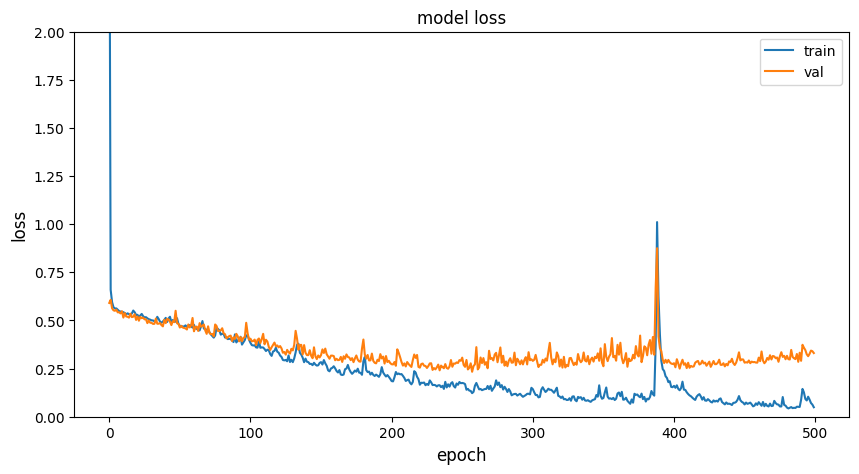

In [43]:
#view training loss curve
metric = "loss"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.ylim(ymax=2,ymin=0)
plt.show()
plt.close()

# further reading on diagnosing learning curve: 
# https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

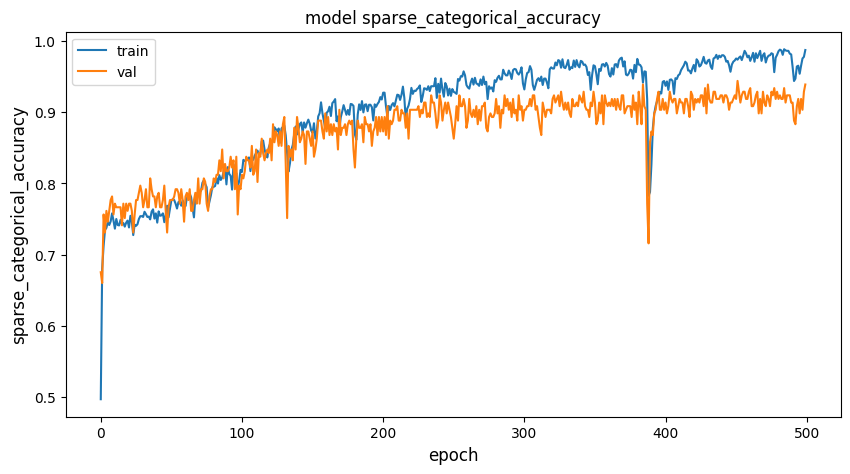

In [44]:
#view training accuracy curve
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

# further reading on diagnosing learning curve: 
# https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

In [49]:
#calculate confusion matrix
from sklearn.metrics import confusion_matrix
>>> y_true = Y_test
>>> y_pred = np.argmax(model.predict(X_test),axis = 1)
>>> confusion_matrix(y_true, y_pred)

31/31 [==============================] - 0s 5ms/step


array([[557,  45],
       [ 52, 315]])